# **Лабораторная работа №8 по вычислительной математикe.**

## Работу выполнил: Шурыгин Антон, Б01 - 909.

### **XI.9.3(а)**

### Построить алгроритм метода пристрелки для вычисления следующих нелинейных задач:

$$
y'' + sin(y) = 0
$$

#### Причем $0 < x \leq x_k$

$$ y(0) = 0, \:\: y(x_k) = \pi,\\
    x_k = 0.5, 1, 2, 4, 6
$$


In [144]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

#### Дана краевая задача

\begin{equation*}
 \begin{cases}
    y'' = f(x, y, y')
    \\
    y(0) = 0
    \\
    y(1) = 0
 \end{cases}
\end{equation*}

#### Решение кравевой задачи методом стрельбы базируется на том, что имеются удобные способы численного решения задачи Коши:

\begin{equation*}
 \begin{cases}
    y'' = f(x, y, y')
    \\
    y(0) = 0
    \\
    y'(0) = \alpha
 \end{cases}
\end{equation*}

#### Сводим полученную систему к разностной задаче:


\begin{equation*}
 \begin{cases}
    \frac{y_{k+1} - 2y_k + y_{k-1}}{h^{2}} = f(x, y_k, y_{k+1}), \:\:\: k = \overline{1,n}
    \\
    y_0 = 0
 \end{cases}
\end{equation*}

####  Метод стрельбы будет завершён в случае: 

\begin{equation}
   |y_{n+1} - y(1)| < \varepsilon
\end{equation}

#### А в в виду задачи Коши, вообще говоря, $y_{n+1} = y_{n+1}(\alpha)$. Таким образом (1) равносильно поиску нуля функции:

\begin{equation*}
   F(\alpha) = y_{n + 1} - y(1)
\end{equation*}


#### Поиск нуля осуществляем методом Ньютона:

\begin{equation*}
   \alpha_{p + 1} = \alpha_p - \frac{F(\alpha_p)}{F'(\alpha_p)}, \:\:\: p = 0, 1, ...
\end{equation*}

#### Производную вычисляем по формуле численного дифференцирования:
$$
\begin{equation*}
   F'(\alpha_{p}) = \frac{F(\alpha_{p} + h) - F(\alpha_{p})}{h} = \frac{F(\alpha_{p}) - F(\alpha_{p-1})}{\alpha_{p} - \alpha_{p-1}}
\end{equation*}
$$

#### В условиях задачи XI.9.2(Б) имеем:

\begin{equation*}
 \begin{cases}
    \frac{y_{k+1} - 2y_k + y_{k-1}}{h^{2}} = - sin(y_k), \:\:\: k = \overline{1,n} 
    \\
    y_0 = 0
 \end{cases}
\end{equation*}

#### Для запуска итеративного поиска $y_{n+1}$ учтем, что:

$$
\begin{equation*}
y_1 = y(h) = y(0) + y'(0) \cdot h + y''(0) \cdot \frac{h^{2}}{2} + y'''(0)\cdot \frac{h^{3}}{6} + o(h^{3}) \:\:\: \Rightarrow
\end{equation*}
$$

\begin{equation*}
 \begin{cases}
    y(0) = 0,
   \\
   y'(0) = \alpha
   \\
   y''(0) = -sin(y(0)) = 0
   \\
   y'''(0) = -cos(y(0)) \cdot y'(0) = -\alpha
 \end{cases}
\end{equation*}

$$
\begin{equation*}
y_1 = \alpha \cdot h  - \alpha \cdot \frac{h^{3}}{6} \:\:\: \Rightarrow
\end{equation*}
$$

In [145]:
eps = 1e-6
h = 1e-3

start = 0

In [146]:
y = sp.Symbol('y')
alpha = sp.Symbol('alpha')

def get_y_1(alpha):
    return alpha * h - alpha * (h ** 3) / 6

In [147]:
def shot(start, end, h, alpha):
    y = list([start, get_y_1(alpha)])

    y_k = y[1]
    y_prev_k = y[0]

    for _ in np.arange(start + 2*h, end + h, h):
        y_next_k = (-h ** 2) * np.sin(y_k) + 2 * y_k - y_prev_k
        y.append(y_next_k)

        y_prev_k = y_k
        y_k = y_next_k
    
    return y


def newtoon_meth(start, end, y_end, h, alpha_p):
    y_trajcts = list()
    greater = True

    y = shot(start, end, h, alpha_p)
    y_trajcts.append(y)
    F_alpha_prev_p = y[-1] - y_end
    alpha_prev_p = alpha_p

    if F_alpha_prev_p > 0:
        alpha_p -= 1
    else: alpha_p += 1

    while greater:
        y = shot(start, end, h, alpha_p)
        y_trajcts.append(y)
        F_alpha_p = y[-1] - y_end

        dF_a_p = (F_alpha_p - F_alpha_prev_p) / (alpha_p - alpha_prev_p)

        d_alpha_p = -F_alpha_p / dF_a_p
        
        alpha_prev_p = alpha_p
        
        alpha_p += d_alpha_p
        greater = np.abs(d_alpha_p) > eps

        F_alpha_prev_p = F_alpha_p

    return {"y_trajcts" : y_trajcts, "alpha" : alpha_p}

In [148]:
def plot(x, y_dict, descr):
    alpha = y_dict["alpha"]
    y_trajcts = y_dict["y_trajcts"]

    plt.figure(figsize=[16, 9])
    
    for y_tr in y_trajcts:
        if y_tr == y_trajcts[-1]:
            plt.plot(x, y_tr, color='r')
        else: plt.plot(x, y_tr, color = 'b')

    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y(x)')

    plt.title(descr + f", alpha={alpha}")

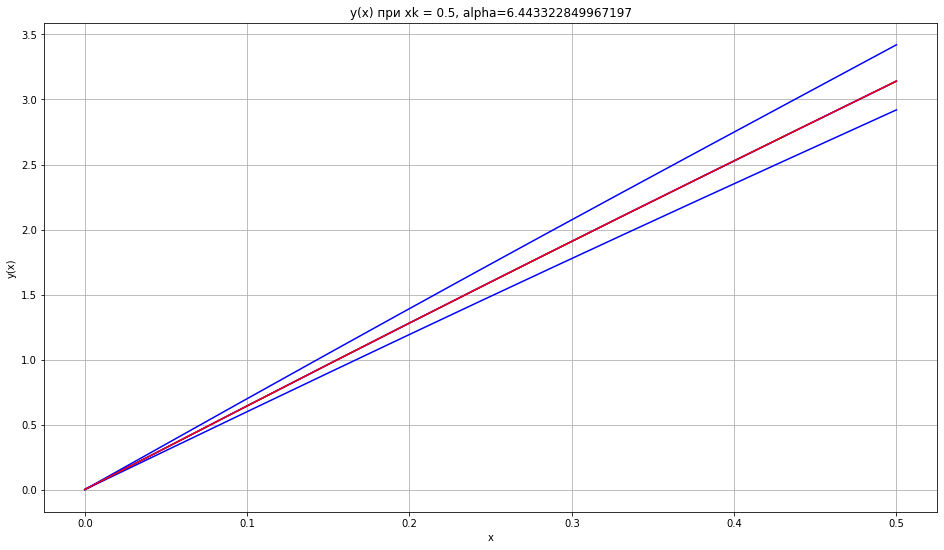

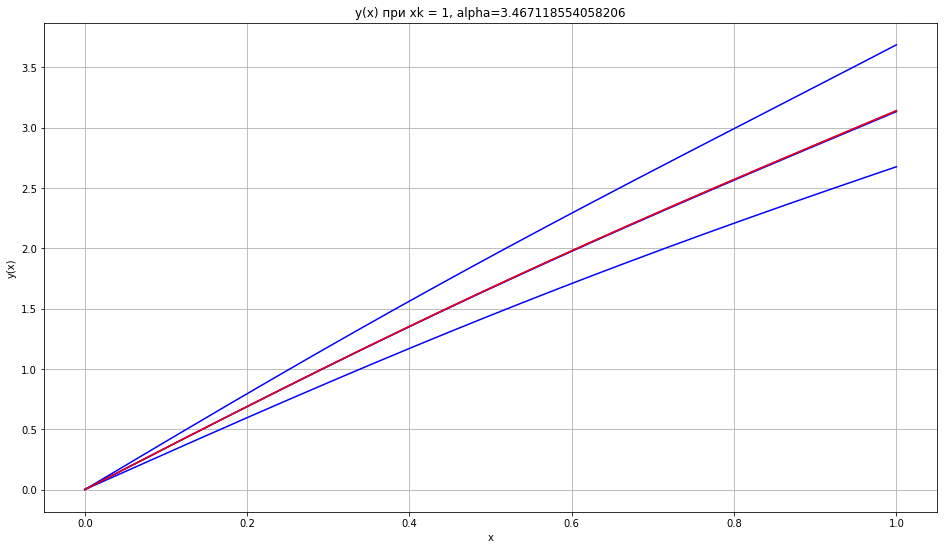

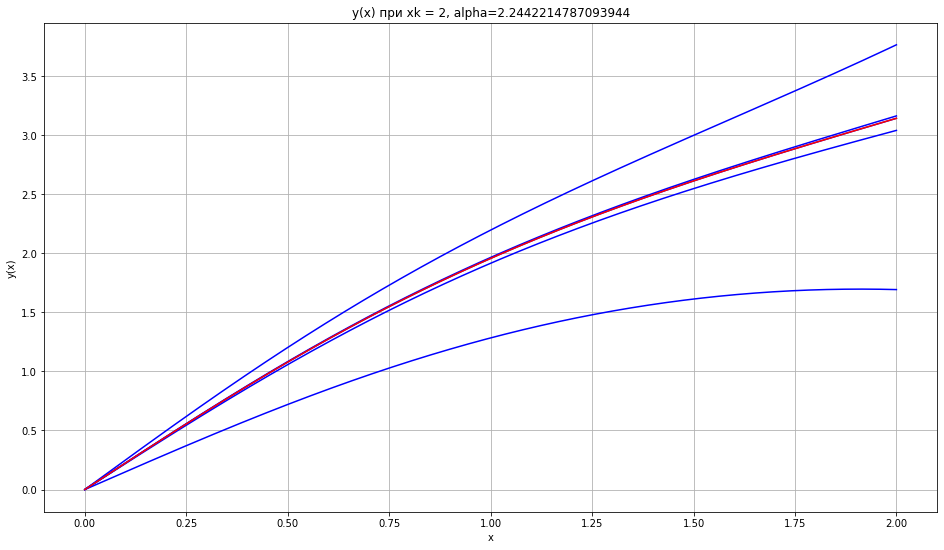

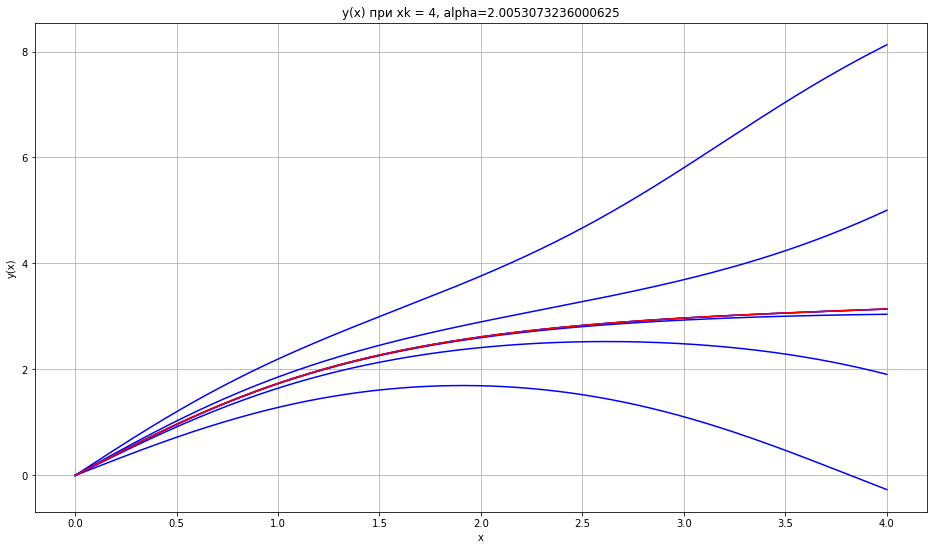

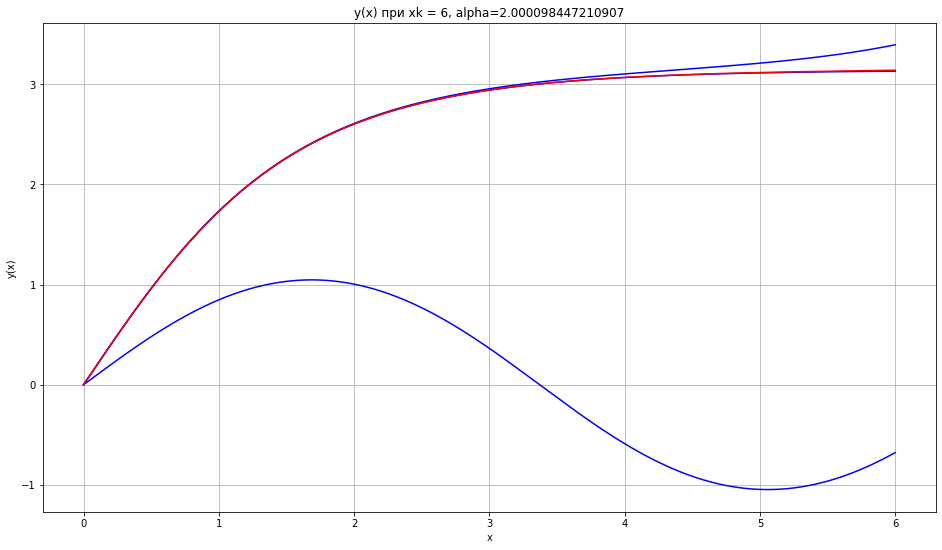

In [160]:
x_k = list([0.5, 1, 2, 4, 6])
alpha_0 = list([6, 3, 2.5, 2.5, 1])
y_end = np.pi

for alp_it, x_it in zip(alpha_0, x_k):
     plot(np.arange(start, x_it + h, h),\
          newtoon_meth(start, x_it, y_end, h, alp_it),\
          f"y(x) при xk = {x_it}")